In [17]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [19]:
from monetio.models import hysplit

In [20]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [21]:
from utilvolc.ashapp import ashinverse

In [22]:

projdir = os.getcwd().replace('notebooks','')

vloc = [160.587,55.978]
tag ='M'
ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
ens.append('gec00')
#ens=['gep04','gep03']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}_{}.nc'.format(tag,x) for x in ens]
tdirlist = [tdir for x in ens]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'RunM')
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'RunM')
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')

/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat


In [23]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,10):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [24]:
# initiate the InverseAshEns object
%autoreload
inverse = ai.InverseAshEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile,verbose=False)

In [25]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunM
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunM
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [26]:
inva = inverse.invlist[1]
inva.cdump.coords

Coordinates:
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 ... 13715 15239 16763 18287
  * y          (y) int64 417 418 419 420 421 422 423 ... 483 484 485 486 487 488
  * x          (x) int64 876 877 878 879 880 881 882 ... 959 960 961 962 963 964
  * ens        (ens) object '102119_2880' '102119_3880' ... '102200_12880'
    source     <U13 'Line to 14 km'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...

In [27]:
# add in the relavant VOLCAT observations
%autoreload
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange)

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [13]:
%autoreload
inverse.invlist[0].print_summary()

Observations availalbe in volcat_avg_hash
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
times in cdump file
2020 10 21 19:00z
2020 10 21 20:00z
2020 10 21 21:00z
2020 10 21 22:00z
2020 10 21 23:00z
2020 10 22 00:00z
2020 10 22 01:00z
2020 10 22 02:00z
2020 10 22 03:00z
2020 10 22 04:00z
2020 10 22 05:00z
2020 10 22 06:00z
2020 10 22 07:00z
2020 10 22 08:00z
2020 10 22 09:00z
2020 10 22 10:00z
2020 10 22 11:00z


4 gep01
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


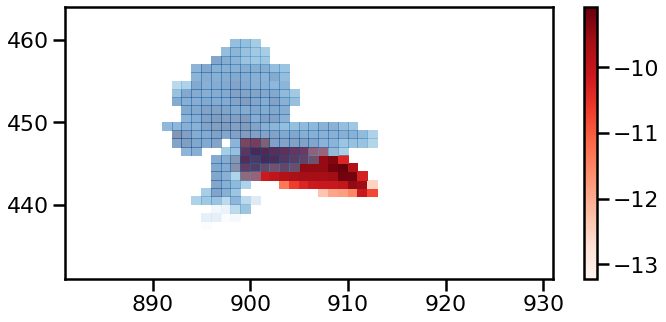

4 gep02
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


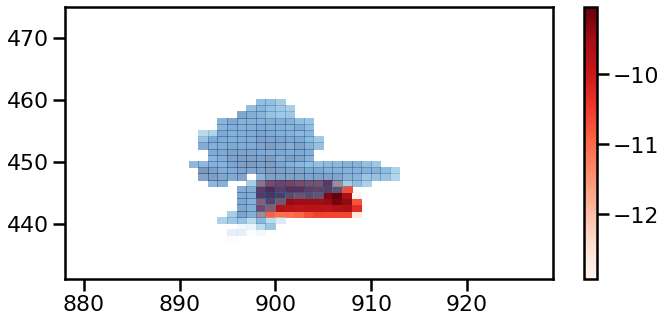

4 gep03
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


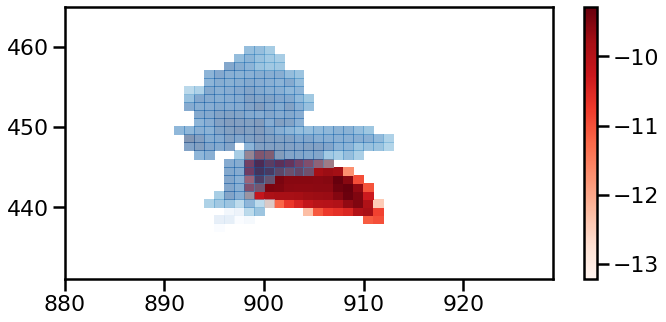

4 gep04
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


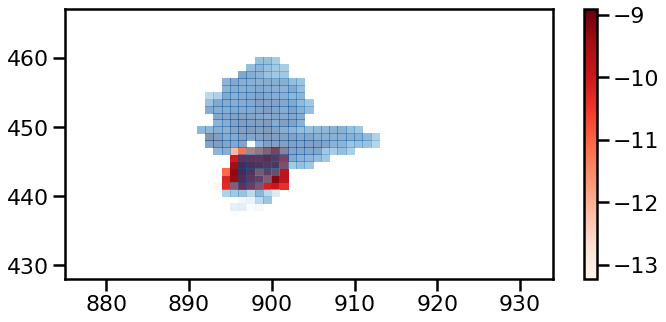

4 gep05
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


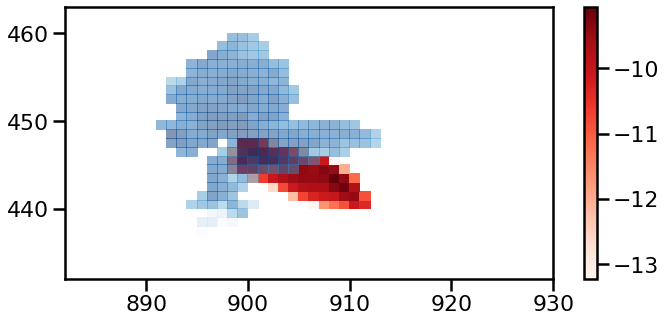

4 gep06
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


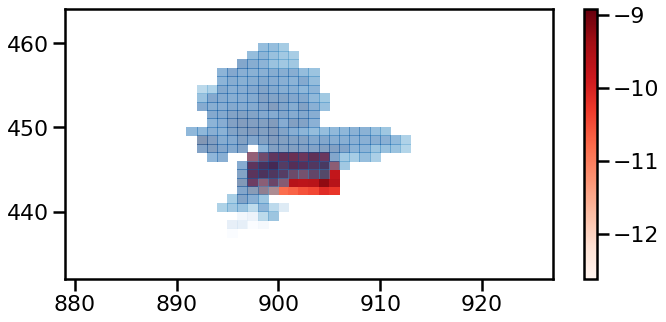

4 gep07
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


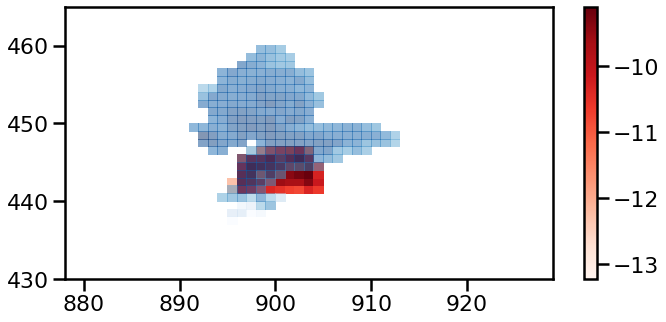

4 gep08
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


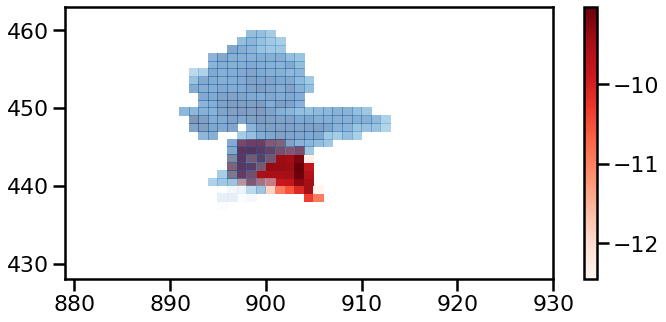

4 gep09
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


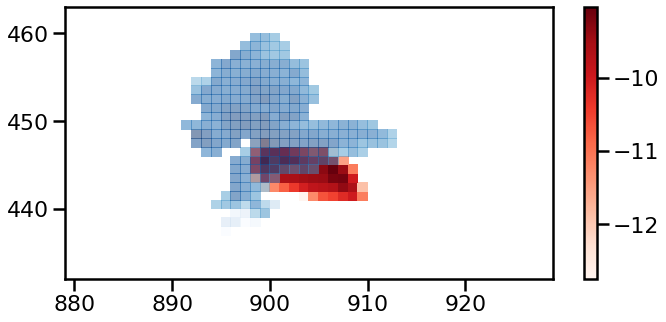

4 gep10
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


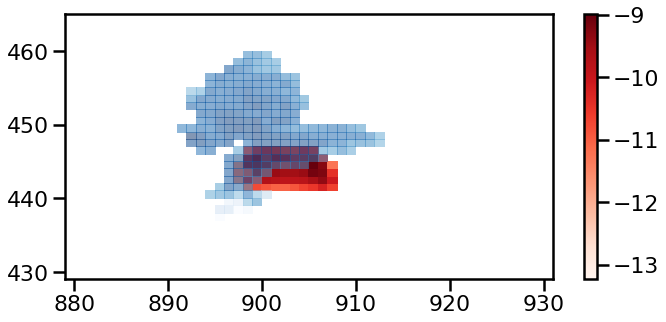

4 gep11
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


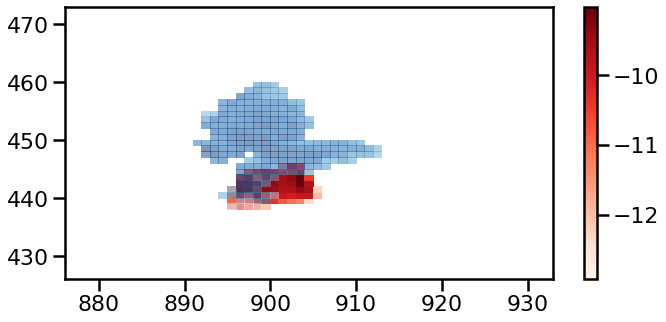

4 gep12
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


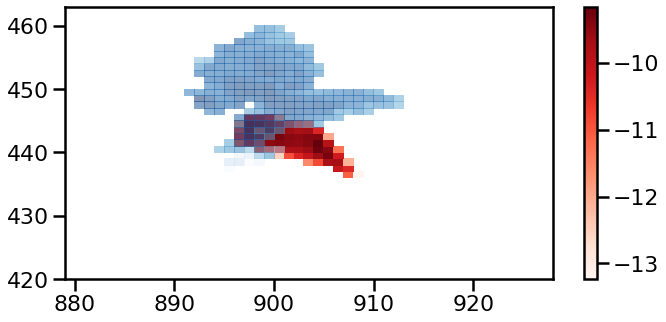

4 gep13
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


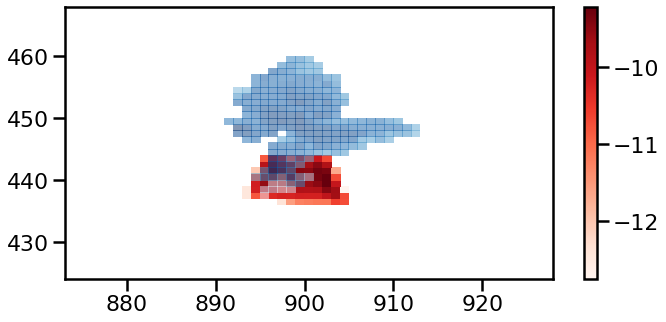

4 gep14
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


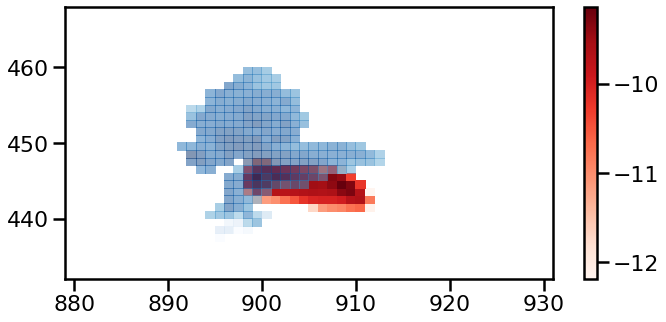

4 gep15
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


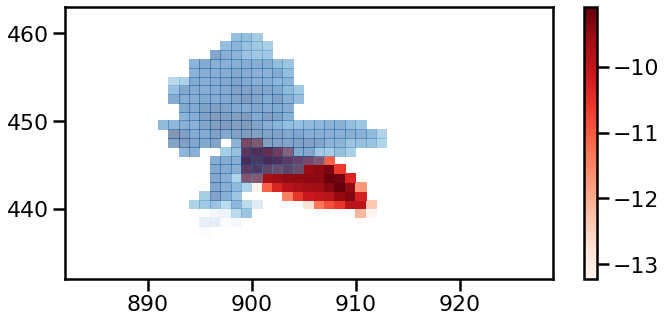

4 gep16
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


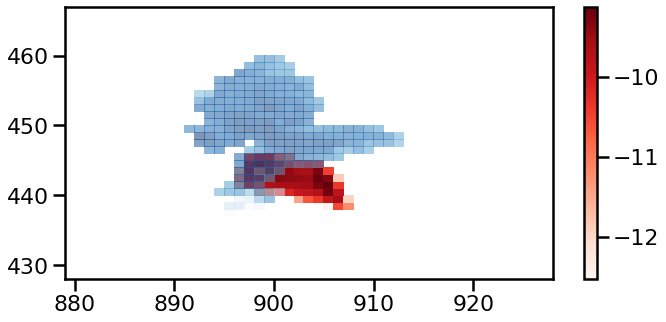

4 gep17
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


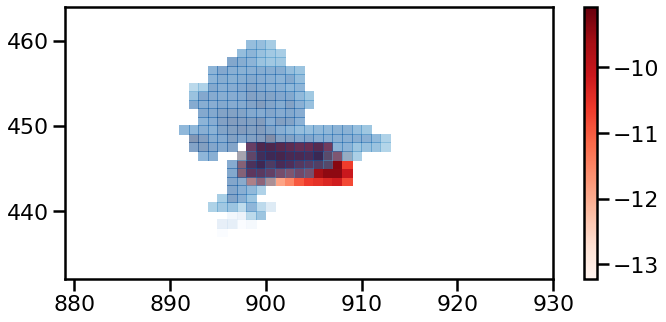

4 gep18
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


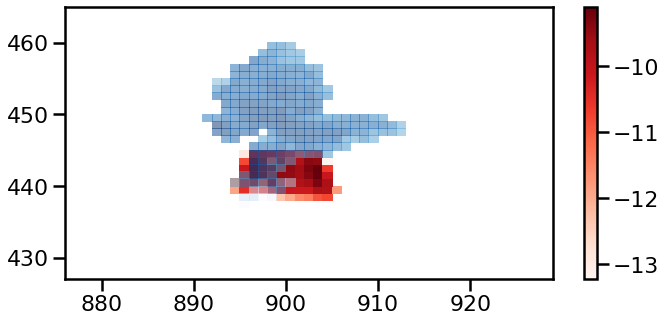

4 gep19
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


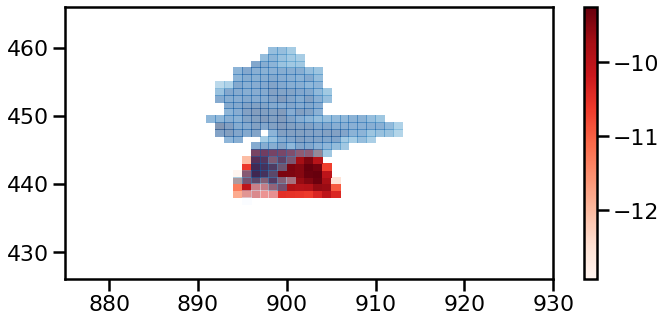

4 gep20
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


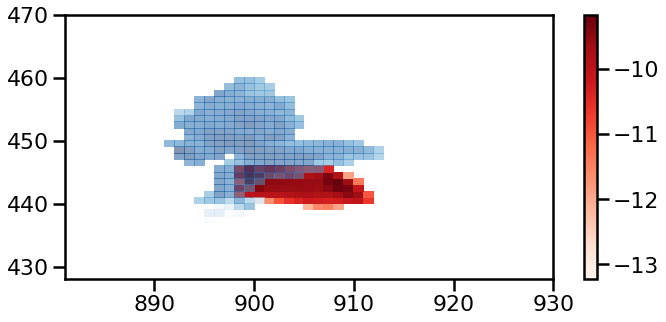

4 gep21
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


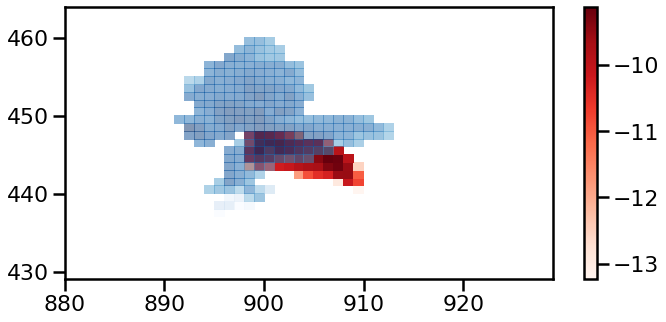

4 gep22
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


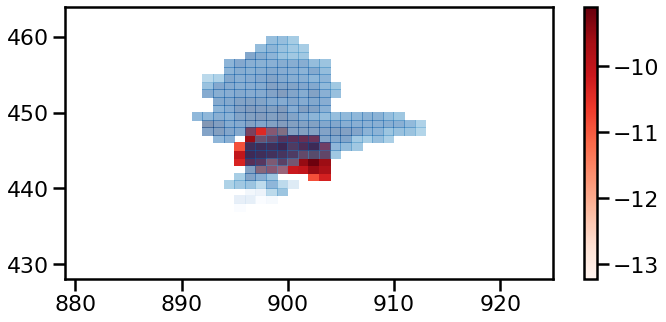

4 gep23
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


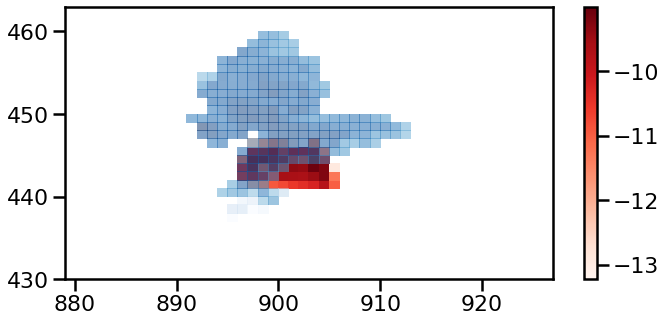

4 gep24
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


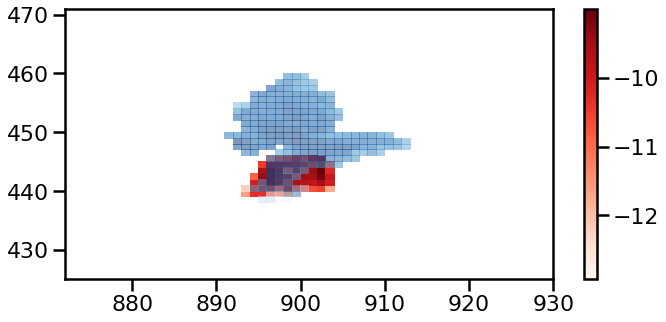

4 gep25
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


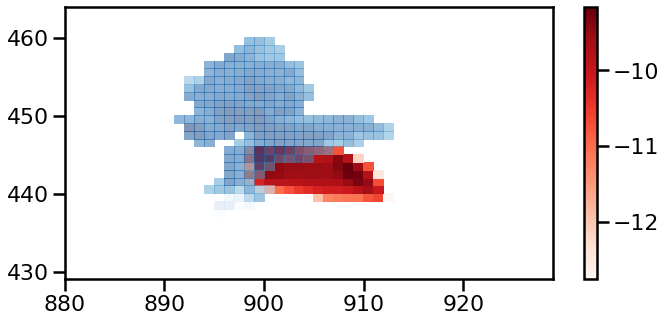

4 gep26
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


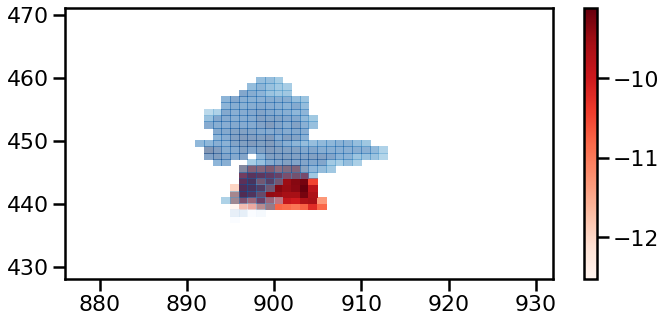

4 gep27
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


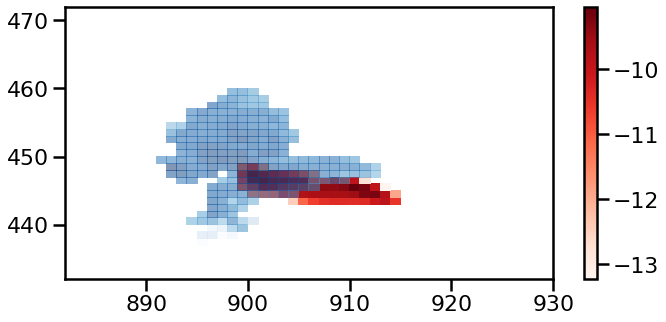

4 gep28
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


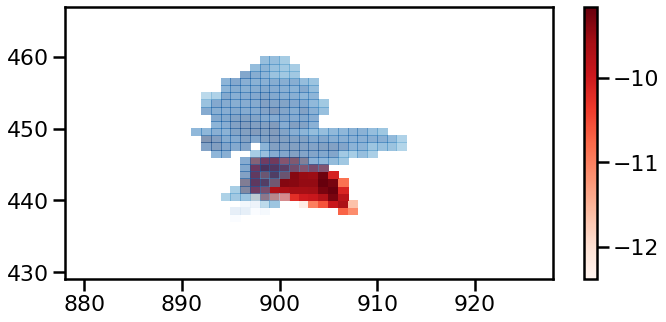

4 gep29
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


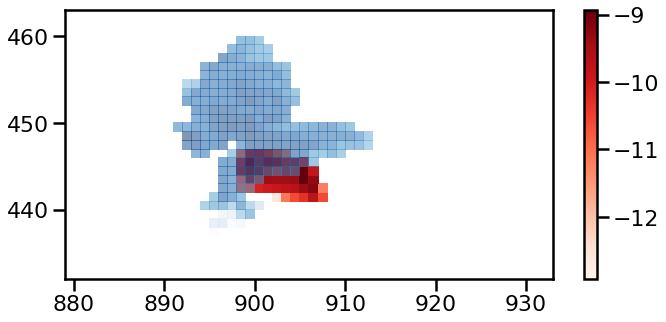

4 gep30
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


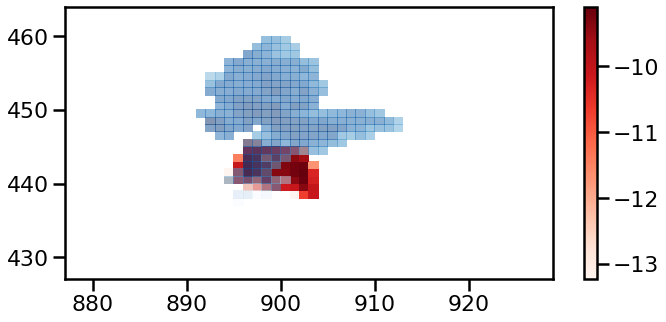

4 gec00
tii 4
102119_11880
{'sdate': datetime.datetime(2020, 10, 21, 19, 0), 'edate': datetime.datetime(2020, 10, 21, 20, 0), 'bottom': 11880.0, 'top': 12880.0}
<xarray.DataArray 'time' ()>
array('2020-10-21T23:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T23:00:00
    source   <U13 'Line to 14 km'


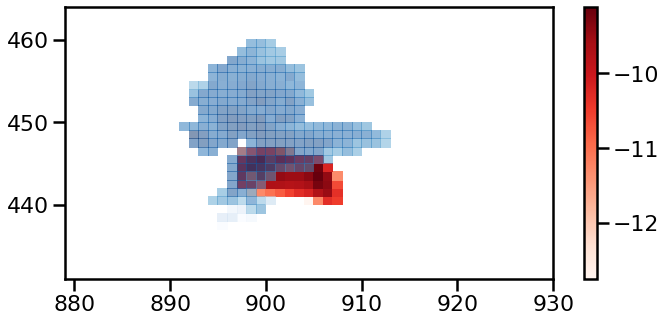

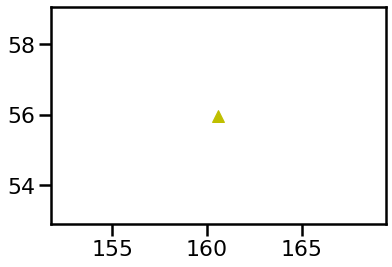

In [14]:
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index of vertical level to show.
           # if None then sum along the z index.
zlevel=9
tii=4
%autoreload
inverse.compare_plotsA(daterange=dlist[0],tii=tii,zii=zlevel,vloc=None)
plt.plot(160.587,55.978,'y^')


In [15]:
%autoreload
inverse.set_concmult(1)

In [97]:
%autoreload
tiilist = [2,3,4]  #times to assimilate in inversion algorithm.
remove_cols=True
remove_rows=False
remove_ncs=5
#remove_sources = None
remove_sources = ['12880']  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tiilist,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources,remove_ncs=remove_ncs)
runtag = ai.create_runtag(tag,tiilist,remove_cols, remove_rows, remove_sources,remove_ncs)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21

/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:798: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  nmax = t3.shape[1]
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:799: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  iremove = []
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:813: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when

2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000
2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21

In [98]:
print(runtag)

RunM_2_3_4_TFw5_12880


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:953: RuntimeWarning: divide by zero encountered in log10
  def make_fake(self):


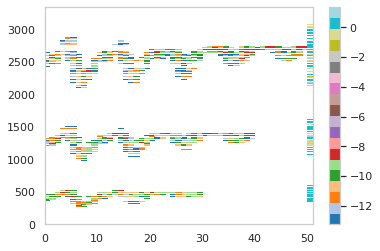

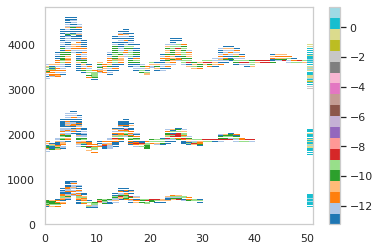

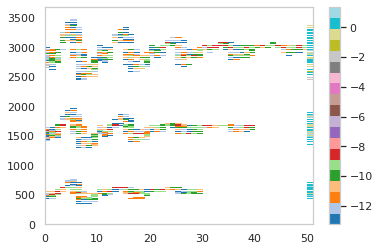

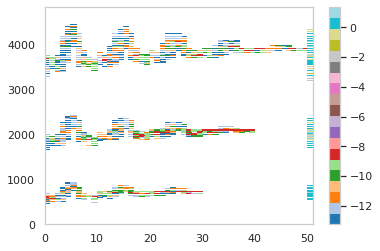

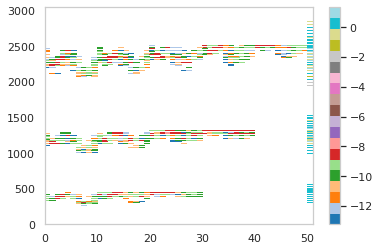

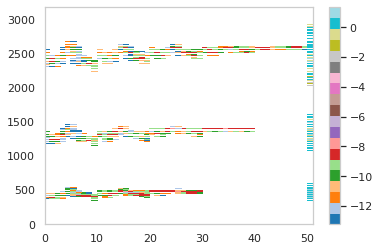

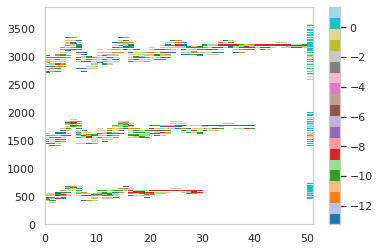

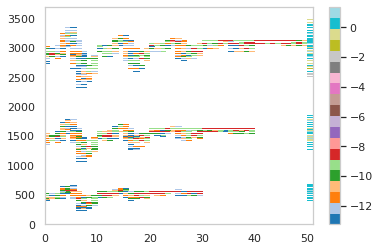

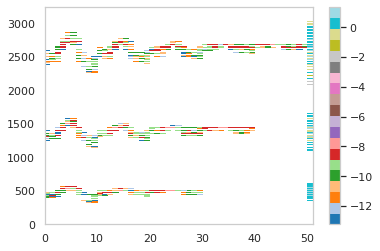

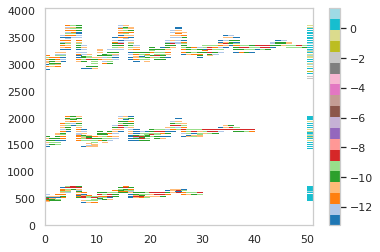

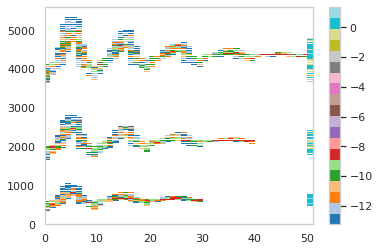

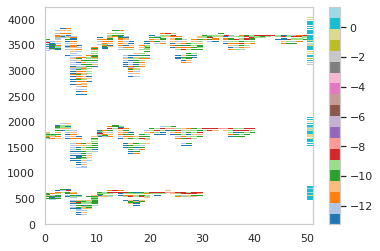

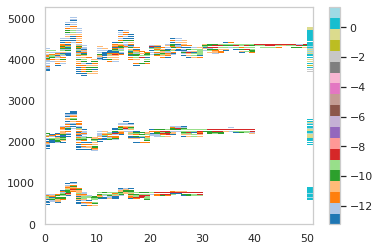

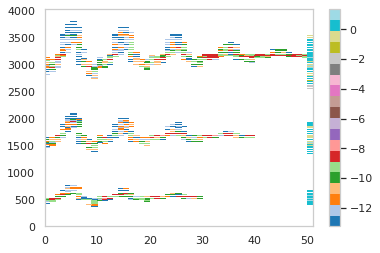

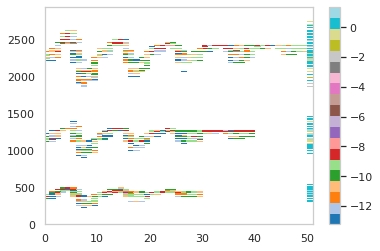

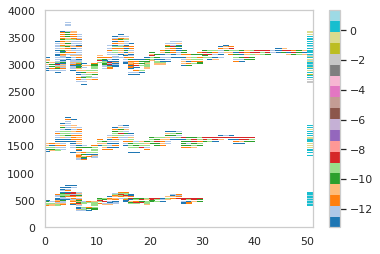

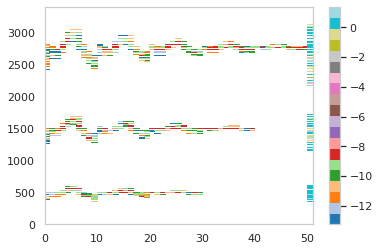

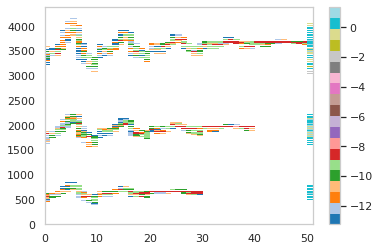

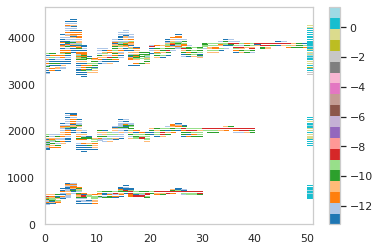

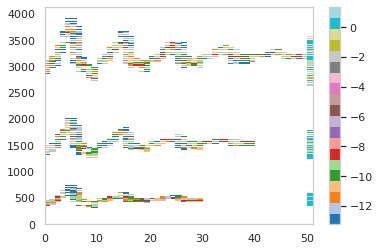

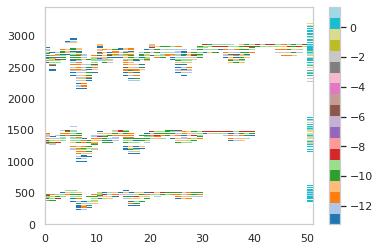

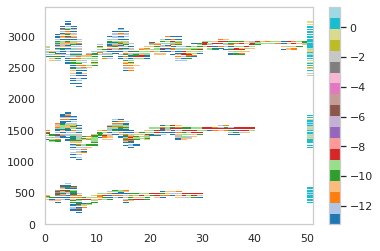

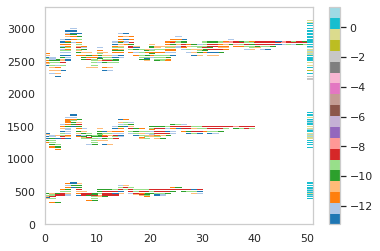

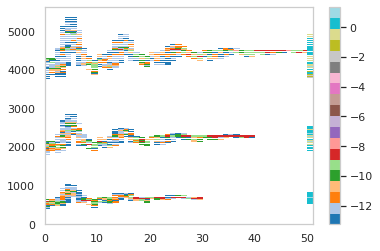

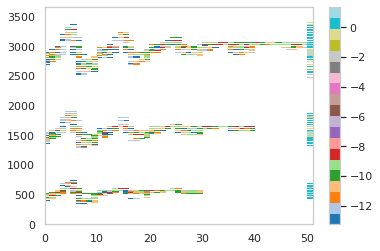

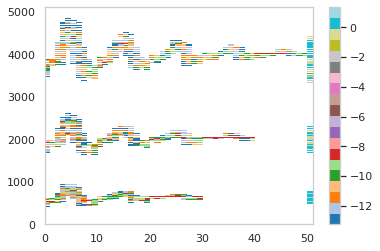

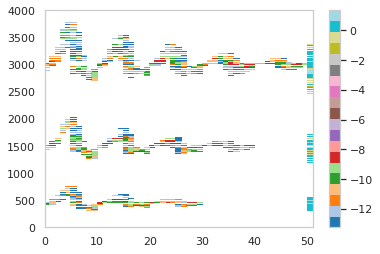

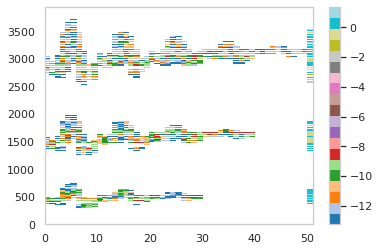

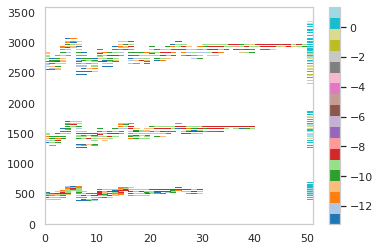

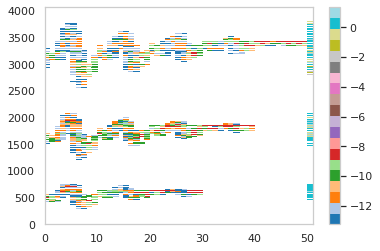

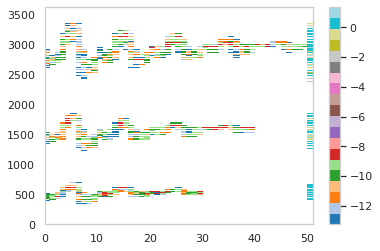

True

In [99]:
%autoreload
inverse.plot_tcm()



In [100]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)

'/hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880'

In [101]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

(3344, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880/runM4.tcm_gep01.txt
(4844, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880/runM4.tcm_gep02.txt
(3685, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880/runM4.tcm_gep03.txt
(4841, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880/runM4.tcm_gep04.txt
(3057, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880/runM4.tcm_gep05.txt
(3184, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880/runM4.tcm_gep06.txt
(3887, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880/runM4.tcm_gep07.txt
(3700, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TFw5_12880/runM4.tcm_gep08.txt
(3251, 51)
N_ctrl 50
output file /hysplit-users/alicec/projects/bezy/Run

In [102]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

gep01
gep02
gep03
gep04
gep05
gep06
gep07
gep08
gep09
gep10
gep11
gep12
gep13
gep14
gep15
gep16
gep17
gep18
gep19
gep20
gep21
gep22
gep23
gep24
gep25
gep26
gep27
gep28
gep29
gep30
gec00


In [75]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

gep01


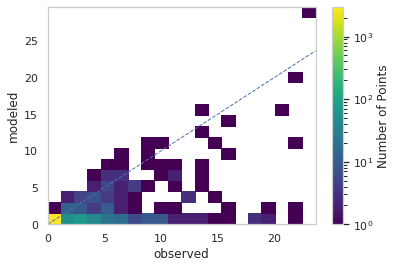

gep02


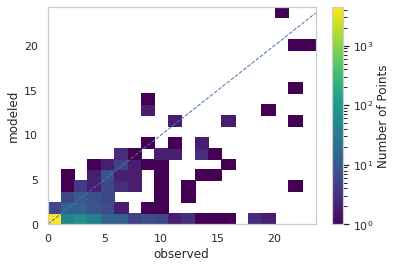

gep03


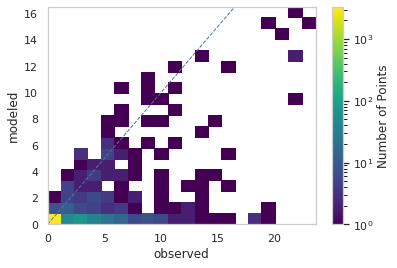

gep04


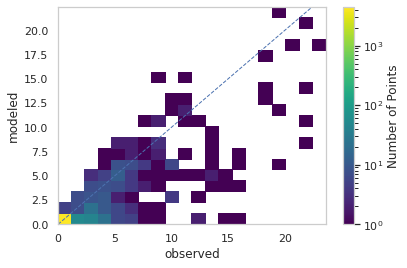

gep05


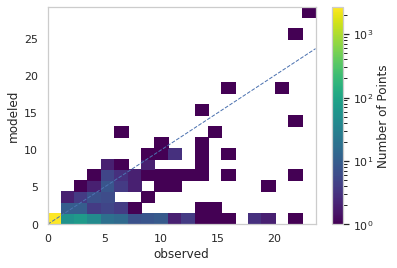

gep06


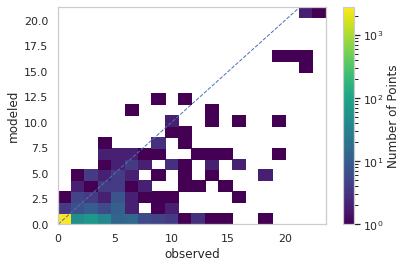

gep07


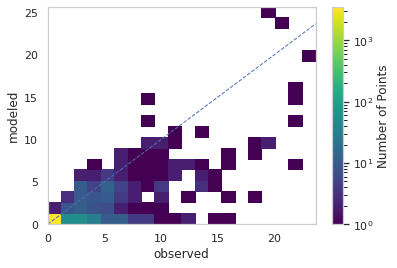

gep08


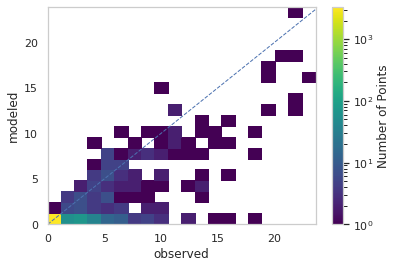

gep09


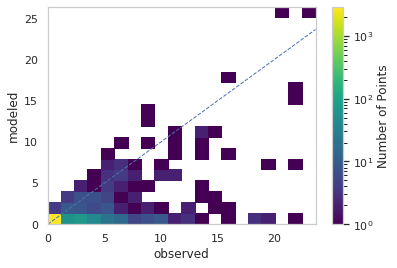

gep10


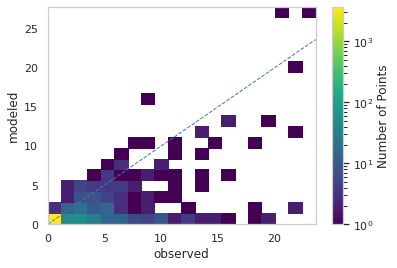

gep11


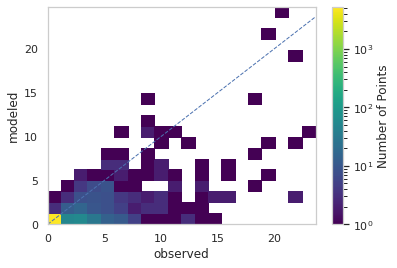

gep12


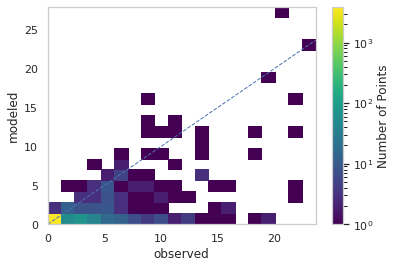

gep13


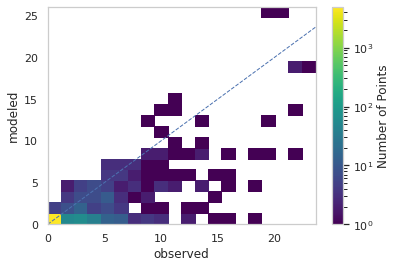

gep14


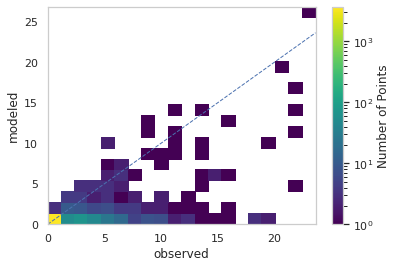

gep15


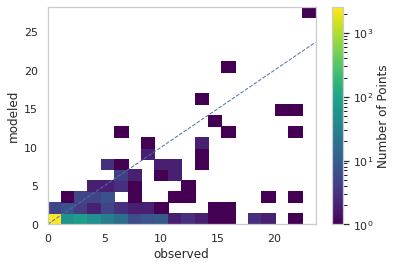

gep16


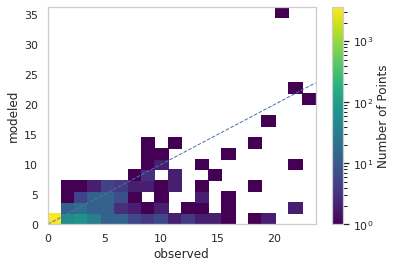

gep17


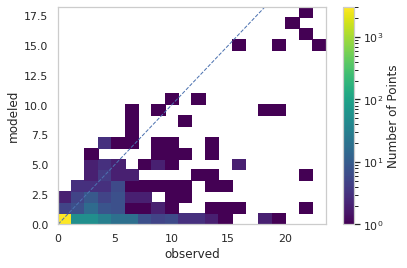

gep18


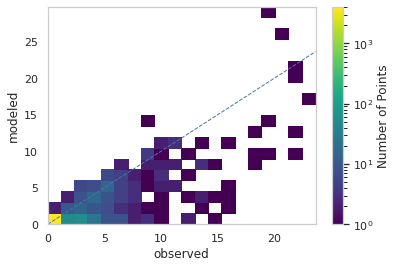

gep19


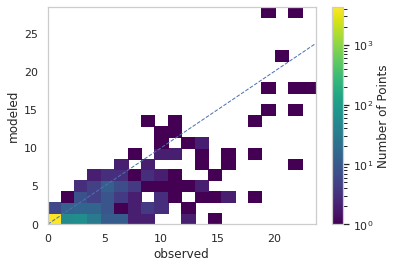

gep20


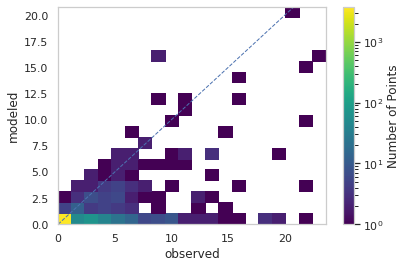

gep21


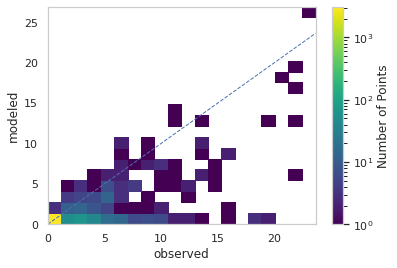

gep22


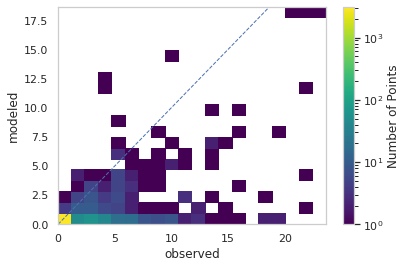

gep23


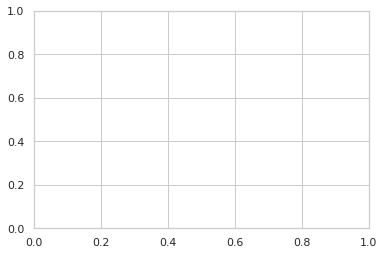

gep24


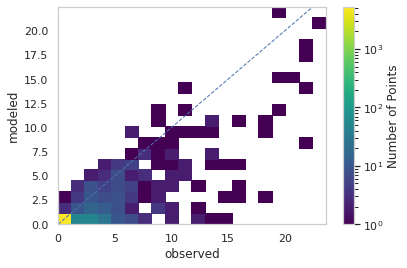

gep25


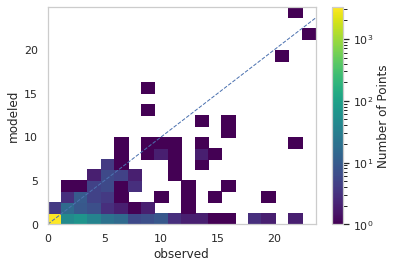

gep26


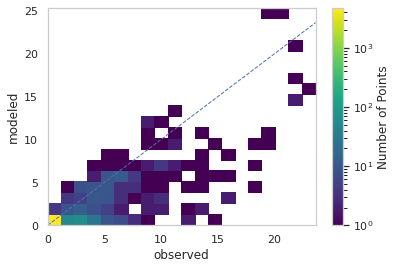

gep27


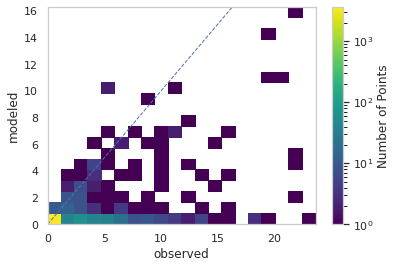

gep28


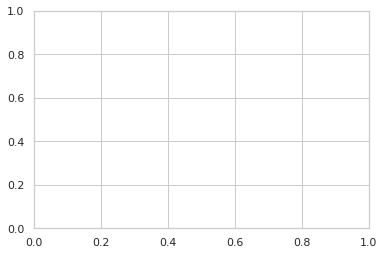

gep29


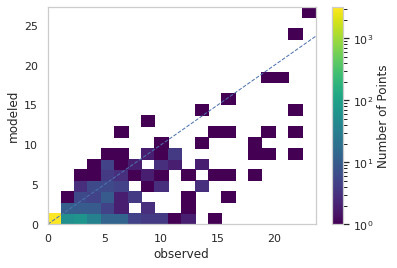

gep30


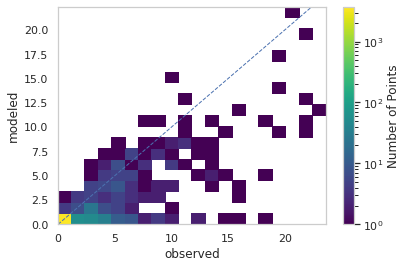

gec00


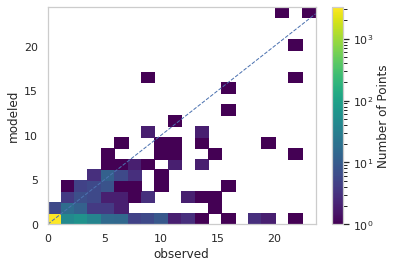

In [103]:
%autoreload
inverse.plot_outdat(eii=None)

Data assimilated over
2020-10-21 21:00:00
2020-10-21 22:00:00
2020-10-21 23:00:00


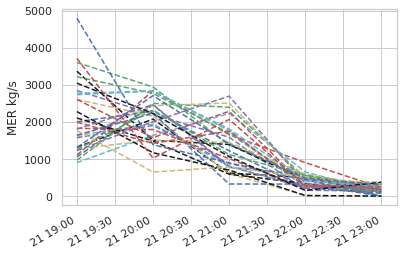

In [104]:
%autoreload
print('Data assimilated over')
for tii in tiilist:
    print(inverse.invlist[0].get_time(tii))
#eii=[14]
eii=None
unit='g/h'
unit='kg/s'
inverse.plot_outdat_ts(eii,unit=unit)
#ax = plt.gca()
#ax.set_ylim(0,10000)

In [105]:
#%autoreload
#inverse.sourcehash = ai.get_sourcehash(configdir,configfile)

gep21


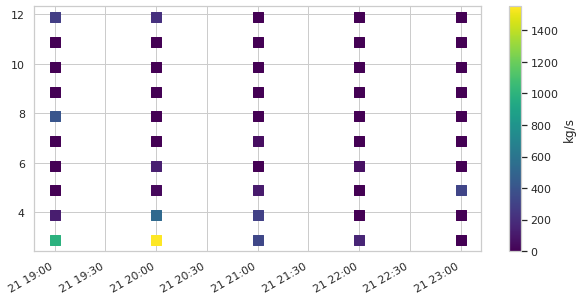

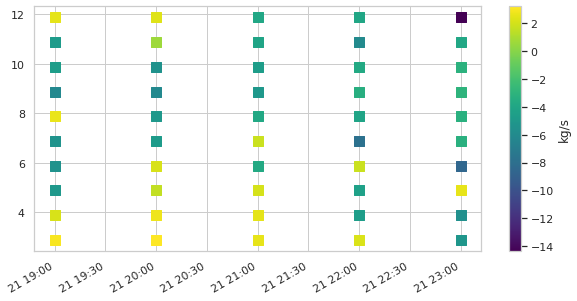

In [109]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=20
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [80]:
inverse.invlist[0].inp

{'HYSPLIT_DIR': '../hysplit',
 'MAP_DIR': '../hysplit/graphics/',
 'WORK_DIR': './',
 'CONVERT_EXE': 'convert',
 'PYTHON_EXE': '/python',
 'forecastDirectory': '/hysplit-users/alicec/projects/bezy/data/GEFS',
 'archivesDirectory': '/hysplit-users/alicec/projects/bezy/data/wrong',
 'GHOSTSCRIPT_EXE': 'gs',
 'DATA_DIR': './',
 'owner': 'ARL',
 'VolcanoName': 'Bezymianny',
 'area': 785000.0,
 'top': 12880.0,
 'bottom': 2880.0,
 'start_date': datetime.datetime(2020, 10, 21, 19, 0),
 'durationOfSimulation': 12.0,
 'testminutes': 0.0,
 'emissionHours': 6.0,
 'meteorologicalData': 'GEFS',
 'EruptionSize': 0.0,
 'latitude': 55.978,
 'longitude': 160.587,
 'samplingIntervalHours': 1.0,
 'eflag': 0.0,
 'source_type': 'uniform',
 'jobname': 'ashtest',
 'runflag': 'inverse',
 'gisOption': 3,
 'zoomFactor': 50,
 'generatingPostscript': True,
 'generatingPDF': True,
 'mapBackground': 'arlmap',
 'mapProjection': 0,
 'spatialPlotRadius': 500.0,
 'graphicsResolution': 200,
 'zip_compression_level': 3,


In [81]:
%autoreload
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunM
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [82]:
dfj = pd.DataFrame()
dfj.empty

True

In [83]:
%autoreload
# creates emit-time:q
#s, CONTROL and SETUP files for HYSPLIT runs.
inverse.make_efile(vloc=vloc)

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep01_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep01
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep01 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep01 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep01 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep01 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep04_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep04
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep04 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep04 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep04 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep04 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep07_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep07
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep07 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep07 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep07 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep07 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep10_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep10
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep10 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep10 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep10 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep10 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep13_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep13
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep13 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep13 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep13 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep13 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep16_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep16
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep16 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep16 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep16 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep16 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep19_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep19
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep19 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep19 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep19 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep19 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep22_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep22
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep22 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep22 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep22 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep22 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep25_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep25
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep25 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep25 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep25 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep25 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gep28_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gep28
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gep28 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gep28 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gep28 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gep28 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

writing efile {} /hysplit-users/alicec/projects/bezy/RunM/RunM_2_3_4_TF/gec00_emit.txt
GEFS
Forecast directory /hysplit-users/alicec/projects/bezy/data/GEFS
fcst str /pub/forecast/%Y%m%d/
making control file  GEFS
/hysplit-users/alicec/projects/bezy/data/wrong
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
fcst str /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/
ZZZZ /hysplit-users/alicec/projects/bezy/data/GEFS/%Y%m%d/hysplit.t%Hz.gefs.gec00
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201021/hysplit.t18z.gefs.gec00 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t06z.gefs.gec00 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t12z.gefs.gec00 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy/data/GEFS/20201022/hysplit.t18z.gefs.gec00 meteorological file does not exist
WARNING /hysplit-users/alicec/projects/bezy

In [84]:
%autoreload
inverse.run_hysplit()

running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep01
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep02
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep03
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep04
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep05
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep06
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep07
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep08
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep09
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep10
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep11
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep12
running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std gep13
running  /hysplit-users/alicec/projects/bezy/hyspli

In [68]:
%autoreload
inverse.set_subdirectory(runtag)
dset = inverse.create_emit_output('RunM4.nc')

makeing file RunM4.nc


In [42]:
dset

<xarray.DataArray 'p060' (source: 1, ens: 31, time: 36, z: 10, y: 232, x: 550)>
array([[[[[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 

In [119]:
for attr in dset.attrs: print(type(dset.attrs[attr]), attr)

<class 'list'> Species ID
<class 'float'> sample time hours
<class 'list'> Starting Locations
<class 'str'> Source Date
<class 'str'> Meteorological Model ID
<class 'numpy.int32'> Number Start Locations
<class 'numpy.int32'> Number of Levels
<class 'numpy.ndarray'> Level top heights (m)
<class 'numpy.int32'> Number of Species
<class 'datetime.timedelta'> Sampling Time
<class 'str'> time description
<class 'dict'> Concentration Grid
<class 'str'> Coordinate time description
<class 'list'> sources
<class 'str'> Method
<class 'str'> units
<class 'str'> MetData


In [154]:
%autoreload
from utilvolc import basic_checks
dset3 = ai.update_attrs_for_netcdf(dset)

In [156]:
dset

<xarray.DataArray 'p060' (source: 1, ens: 31, time: 36, z: 10, y: 232, x: 550)>
array([[[[[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 

In [151]:
dset2.to_netcdf('test.nc')

In [1]:
x = 2 #pg/m3
# 50,000 particles 0.25x0.25 degrees. 100m vertical. 3h time average.
emission = 6.933e4 #g/h
